In [ ]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.7/dist-packages (0.7)


In [ ]:
%reload_ext fortranmagic
#  Para recargar la celda

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
z = [5,5,6,5,6,5,6, 'fifteen', 5.55, 2**9, 'Alejandro']
z

[5, 5, 6, 5, 6, 5, 6, 'fifteen', 5.55, 512, 'Alejandro']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
primero = z[0]
tercero = z[2]
print("primero:  ", primero)
print("segundo:  ", tercero)


primero:   5
segundo:   6


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)


# Que pasa si se pone -3

print(l[-3])

# Si se pone un inidice de atras hacia adelante que se salga

# print(l[-7 ]) Esto ya genera error

last: six
second to last: 5.0
4


In [ ]:
print("Tercero de atras hacia adelante de z:  ",z[-3])

print("Quinto de atras hacia adelante de z:  ",z[-5])

Tercero de atras hacia adelante de z:   5.55
Quinto de atras hacia adelante de z:   6


In [ ]:


# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# Crear unna sublista de los elementos de z

sublistaZ = z[2:5]
sublistaZ

[6, 5, 6]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# Si no se pone nada es como si fuera 0

print("Los primero 5 elementos:  " ,  z[: 5])

Los primero 5 elementos:   [5, 5, 6, 5, 6]


In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# Si no se pone nada al final, es como si se pusiera el tamaño del arreglo

print("Los utimos elemenos iniciando dese el sexto",z[5:])

Los utimos elemenos iniciando dese el sexto [5, 6, 'fifteen', 5.55, 512, 'Alejandro']


In [ ]:
# Que sucede si se ponen negativos en el slice

print(l[-3:-1])   # Este primer caso devuelve algo

print(l[-1:-3])  # Aqui devuelve un arreglo vacio porque ya no hay mas elementos desde -1 -3

[4, 5.0]
[]


In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
print(l[1:7:2])


# Se puede en el intervalo deseado

print(l[2:6:2])

['b', 'd', 'f']
['c', 'e']


In [ ]:
# Para hacer un slides con pasos 

print("Los elementos  desde el 2 hasta el 6 de 2 en 2:  ",z[2:6:2] )

Los elementos  desde el 2 hasta el 6 de 2 en 2:   [6, 6]


In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# revertir una lista

z[::-1]

['Alejandro', 512, 5.55, 'fifteen', 6, 5, 6, 5, 6, 5, 5]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
#Agregar elementos a las listas

print(z)
z.append(35)
print(z)

[5, 5, 6, 5, 6, 5, 6, 'fifteen', 5.55, 512, 'Alejandro']
[5, 5, 6, 5, 6, 5, 6, 'fifteen', 5.55, 512, 'Alejandro', 35]


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
print([x * 2 for x in l]) #  Permite crear una nueva lista


[2, 4, 6, 8, 10]


In [ ]:
# Para crear una nueva lista a a partir de la modificación de una ya existente

zz = [15,35,56,546,3,55,54]
zz = [x**4/2 for x in zz]

print(zz)

[25312.5, 750312.5, 4917248.0, 44436574728.0, 40.5, 4575312.5, 4251528.0]


## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
# Diccionario de materias y notas

materias = {"algoritmos": 5, "optimizacion": 2.9, "sistemas": 4.6, "lenguajes": 2, "metodos": 3.5,"ingesoft": 5 }
materias

{'algoritmos': 5,
 'ingesoft': 5,
 'lenguajes': 2,
 'metodos': 3.5,
 'optimizacion': 2.9,
 'sistemas': 4.6}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
print("La nota de lenguajes es:  ", materias['lenguajes'])

La nota de lenguajes es:   2


In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
del materias ['algoritmos']
materias

{'ingesoft': 5,
 'lenguajes': 2,
 'metodos': 3.5,
 'optimizacion': 2.9,
 'sistemas': 4.6}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [ ]:
# En los diccionarios no es posible hacer el slicing

materias['optmizacion': 'lenguajes']  # Esto da error

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
x = [[5,6,5],
     [66,5,6],
     [6,6,5],
     [6,5,6]]

y = [[6,5,6,5],
     [6,5,6,5]
]     
print(x)
print(y)

[[5, 6, 5], [66, 5, 6], [6, 6, 5], [6, 5, 6]]
[[6, 5, 6, 5], [6, 5, 6, 5]]


In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 33 µs, sys: 7 µs, total: 40 µs
Wall time: 45.1 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
# Esto permite bservar el timpo de ejecución de la multiplicación de las matrices

%%time
matmul(x,y)

CPU times: user 31 µs, sys: 7 µs, total: 38 µs
Wall time: 44.1 µs


[[66, 55, 66, 55], [426, 355, 426, 355], [72, 60, 72, 60], [66, 55, 66, 55]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.196897828102646, 0.47771309328521094, 0.4003923718658765],
 [0.8472309361353088, 0.3386433616522063, 0.33815689559540396]]

In [ ]:
#Permite generar matrices con numeros mas grandes
def random_grande(m,n):
    out = []
    for row in range(m):
        out.append([random.random()*50000 for _ in range(n)])
    return out


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
outran = matmul(randa, randb)

CPU times: user 10.1 s, sys: 28.1 ms, total: 10.1 s
Wall time: 10.2 s


In [ ]:
%%time

# Se supone que esto le deberia tomar mas tiempo
randomx = random_grande(1000, 2000)
randomy = random_grande(2000, 500)

salidaRandom = matmul(randomx, randomy)


CPU times: user 5min 39s, sys: 522 ms, total: 5min 40s
Wall time: 5min 42s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

    # Funcion que permite hacer el producto punto

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
listaPropia = [float(i) for i in range(5000000)]
arrayPropio=np.array(listaPropia) 

# Lo que se hace es crear un arreglo de numpy

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.4 ms, sys: 0 ns, total: 12.4 ms
Wall time: 13 ms


333328333350000.0

In [ ]:
%%time
python_dot_product(listaPropia, listaPropia)

CPU times: user 370 ms, sys: 0 ns, total: 370 ms
Wall time: 373 ms


4.16666541667329e+19

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 226 µs, sys: 1 µs, total: 227 µs
Wall time: 262 µs


333328333350000.0

In [ ]:
%%time
# La función de fortra corre mucho mas rapido
fortran_dot_product(arrayPropio, arrayPropio)

CPU times: user 9.52 ms, sys: 866 µs, total: 10.4 ms
Wall time: 10.7 ms


4.16666541667329e+19

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
dataP = np.array([2,6,5,4,2,6,1,5,6,5,1,0,6,14])
dataP

array([ 2,  6,  5,  4,  2,  6,  1,  5,  6,  5,  1,  0,  6, 14])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
dataP * dataP

array([  4,  36,  25,  16,   4,  36,   1,  25,  36,  25,   1,   0,  36,
       196])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 613 µs, sys: 0 ns, total: 613 µs
Wall time: 622 µs


333328333350000.0

In [ ]:
%%time

(arrayPropio * arrayPropio).sum()

CPU times: user 16.7 ms, sys: 17.7 ms, total: 34.4 ms
Wall time: 37.5 ms


4.166665416666759e+19

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 264 µs, sys: 3.99 ms, total: 4.26 ms
Wall time: 4.51 ms


333328333350000.0

In [ ]:
%%time
# El resultado es mucho mas rapido que el realizado por la función que se hizo 
arrayPropio.dot(arrayPropio)


CPU times: user 5.76 ms, sys: 0 ns, total: 5.76 ms
Wall time: 6.08 ms


4.1666654166666215e+19

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 237 µs, sys: 1e+03 ns, total: 238 µs
Wall time: 249 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(arrayPropio, arrayPropio)

##El resultado es mas cercano a la operación realizada con la funcion de numpy

CPU times: user 16.4 ms, sys: 3.99 ms, total: 20.4 ms
Wall time: 23 ms


4.16666541667329e+19

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
four = np.array([1,2,3,4])
two_by_two = four.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
## Cambiar la forma de un arreglo 

sevenByTow = dataP.reshape(7,2)
sevenByTow

array([[ 2,  6],
       [ 5,  4],
       [ 2,  6],
       [ 1,  5],
       [ 6,  5],
       [ 1,  0],
       [ 6, 14]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
# Se puede asignar un tipo de dato al arreglo
arrPropip = np.array([1, 2, 3, 4, 5, 6, 7,8,9,10], dtype='str').reshape(5, 2)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arrPropip.dtype)
print("Shape:", arrPropip.shape)
print("Strides:", arrPropip.strides)
print("Data:", arrPropip.data.tobytes())

# lo que se hizo fue crear un arreglo pero de strings

Array:
[[1 2 3]
 [4 5 6]]
DType: <U2
Shape: (5, 2)
Strides: (16, 8)
Data: b'1\x00\x00\x00\x00\x00\x00\x002\x00\x00\x00\x00\x00\x00\x003\x00\x00\x00\x00\x00\x00\x004\x00\x00\x00\x00\x00\x00\x005\x00\x00\x00\x00\x00\x00\x006\x00\x00\x00\x00\x00\x00\x007\x00\x00\x00\x00\x00\x00\x008\x00\x00\x00\x00\x00\x00\x009\x00\x00\x00\x00\x00\x00\x001\x00\x00\x000\x00\x00\x00'


In [ ]:
arrayPropio

array([0.000000e+00, 1.000000e+00, 2.000000e+00, ..., 4.999997e+06,
       4.999998e+06, 4.999999e+06])

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
datap = np.arange(500).reshape(5,100)
datap

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
        152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 17

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# La multiplicacion nomral elemento a elemento

datap * datap

array([[     0,      1,      4,      9,     16,     25,     36,     49,
            64,     81,    100,    121,    144,    169,    196,    225,
           256,    289,    324,    361,    400,    441,    484,    529,
           576,    625,    676,    729,    784,    841,    900,    961,
          1024,   1089,   1156,   1225,   1296,   1369,   1444,   1521,
          1600,   1681,   1764,   1849,   1936,   2025,   2116,   2209,
          2304,   2401,   2500,   2601,   2704,   2809,   2916,   3025,
          3136,   3249,   3364,   3481,   3600,   3721,   3844,   3969,
          4096,   4225,   4356,   4489,   4624,   4761,   4900,   5041,
          5184,   5329,   5476,   5625,   5776,   5929,   6084,   6241,
          6400,   6561,   6724,   6889,   7056,   7225,   7396,   7569,
          7744,   7921,   8100,   8281,   8464,   8649,   8836,   9025,
          9216,   9409,   9604,   9801],
       [ 10000,  10201,  10404,  10609,  10816,  11025,  11236,  11449,
         11664,  11881,

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# raiz cuadrada elemento por elemento

np.sqrt(datap)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
         2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ,
         3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739,
         3.87298335,  4.        ,  4.12310563,  4.24264069,  4.35889894,
         4.47213595,  4.58257569,  4.69041576,  4.79583152,  4.89897949,
         5.        ,  5.09901951,  5.19615242,  5.29150262,  5.38516481,
         5.47722558,  5.56776436,  5.65685425,  5.74456265,  5.83095189,
         5.91607978,  6.        ,  6.08276253,  6.164414  ,  6.244998  ,
         6.32455532,  6.40312424,  6.4807407 ,  6.55743852,  6.63324958,
         6.70820393,  6.78232998,  6.8556546 ,  6.92820323,  7.        ,
         7.07106781,  7.14142843,  7.21110255,  7.28010989,  7.34846923,
         7.41619849,  7.48331477,  7.54983444,  7.61577311,  7.68114575,
         7.74596669,  7.81024968,  7.87400787,  7.93725393,  8.        ,
         8.06225775,  8.1240384 ,  8.18535277,  8.2

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# permite hacer ciertas comparasiones 

# Para valores entre 50 y 300

(datap > 50) & (datap < 300)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  Tru

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
# Multiplica por la transpuesta

datap @ datap.T

array([[  328350,   823350,  1318350,  1813350,  2308350],
       [  823350,  2318350,  3813350,  5308350,  6803350],
       [ 1318350,  3813350,  6308350,  8803350, 11298350],
       [ 1813350,  5308350,  8803350, 12298350, 15793350],
       [ 2308350,  6803350, 11298350, 15793350, 20288350]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
## Aqui se podra haber seleccionado otro subindice del arrelgo 

sines[5]

0.9849610127154954

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
# Igualmente para extraer la información en intervalos

sines[:-3]

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 ])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Comenzando desde el 0

cosines[:5]

array([1.        , 0.93975313, 0.76627189, 0.50045969, 0.17434523])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# Se puden poner los condicionales dentro de la sentencia de imprimir

print("cosenos: \n", cosines)
print("Cosenos cuyo valor = 0 > , en \n", sines == 0)
print("Cosenos [cosines == 0]:\n", cosines[cosines == 0])

cosenos: 
 [ 1.          0.93975313  0.76627189  0.50045969  0.17434523 -0.17277674
 -0.4990802  -0.76524761 -0.93920748 -0.99999873]
Cosenos cuyo valor = 0 > , en 
 [ True False False False False False False False False False]
Cosenos [cosines == 0]:
 []


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
# Primero se crea un arreglo grande que ordenar


aOrdenar = [] 
for i in range(0, 5000):
  n = random.randint(-500,500)
  aOrdenar.append(n)


print(aOrdenar)


#Luego se convierte a nympy array


aOrdenarArreglo = np.array(aOrdenar)
print(aOrdenarArreglo)

[-173, -278, 224, 326, -171, -472, 77, -189, -175, 352, 424, 330, -242, -222, 487, -20, -74, 195, 61, -421, 181, 340, 324, -133, 302, 204, 157, -40, -261, -152, 366, -274, -473, -419, -419, 303, 38, 476, -288, 244, -375, -233, -170, -108, -299, -390, 146, 69, 312, 258, 216, 17, 165, 101, 215, 16, 320, -266, 354, -41, -116, 316, 445, -230, -315, -138, -110, 351, -448, -337, 413, 288, -146, -450, 471, 259, -49, -145, -271, -237, 421, 131, -123, 477, 29, 460, 1, 392, -186, 37, 233, 278, 356, -363, -299, -62, -470, -49, 312, 441, 300, 418, 49, -241, -99, -439, 399, 408, -270, 93, -427, 98, -24, -438, 191, -136, 10, 80, 57, -111, 319, 147, -228, 166, -160, -98, -50, 101, -353, -398, -14, 414, 494, -128, 241, -28, 443, 11, 325, -154, -9, -247, -271, 32, 256, -405, -423, -132, -185, -212, 163, 415, 120, -26, 289, 26, 128, 477, 486, 432, 27, -221, 280, 131, 335, -358, -217, -380, 314, 193, -298, 189, -344, -149, 38, 344, 304, 402, 219, 298, -84, -17, 336, 262, -234, 195, 479, 172, -422, 91, -2

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
# Aqui se hace el ordenamento

indicesOrdenado = np.argsort(aOrdenarArreglo)
indicesOrdenado

array([2088, 3953, 2631, ..., 2112, 2113,  194])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
#  Ahora para ver el arreglo como tal ordenado

aOrdenarArreglo[indicesOrdenado]

array([-500, -500, -500, ...,  500,  500,  500])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
datap = np.arange(64).reshape(8,8)
datap

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
# Hacer los slices pero de matrices

datap[1:6 , 2:5]

array([[10, 11, 12],
       [18, 19, 20],
       [26, 27, 28],
       [34, 35, 36],
       [42, 43, 44]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0245334964039339

In [ ]:
# Varianza del arreglo que se habia creado antes

variance(aOrdenarArreglo)

83319.41765936

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
# Media del areglo de antes

aOrdenarArreglo.mean()


-0.3492

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
# Se convierte el arreglo random en multidimensional
arregloMulti = aOrdenarArreglo.reshape(500,10)
arregloMulti

array([[-173, -278,  224, ..., -189, -175,  352],
       [ 424,  330, -242, ...,  195,   61, -421],
       [ 181,  340,  324, ...,  -40, -261, -152],
       ...,
       [ 281, -196,  391, ..., -267, -277,  230],
       [-349, -253, -289, ...,   98,  253, -224],
       [ 355, -343, -384, ...,  107,  291,   61]])

In [ ]:
# Se halla la media de ese

arregloMulti.mean()

-0.3492

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [ ]:
# se puede por ejes

print(arregloMulti.mean(axis = 0))
print(arregloMulti.mean(axis = 1))

[ -7.458 -11.37   16.874  -7.35   13.77  -14.934 -12.552 -11.29   23.614
   7.204]
[ -47.9   51.8   92.2  -44.6  -79.   109.7  -58.2   13.3  163.9   37.7
   61.8  -70.   -55.4  160.4 -159.6  251.    10.4  100.3   77.8 -181.5
   75.3  -30.9 -237.7   19.8   82.3 -129.7   76.9    3.    46.1   95.3
  -97.7  -85.9  -47.4   42.4   45.   -21.3   36.5  120.    53.2  231.7
   73.   -21.    81.   125.6   96.4  116.  -174.8  101.1   -8.2   64.5
   30.3  -38.4  -44.3  -82.3 -212.9  -89.1  -63.8  -82.6   31.5  -99.1
   80.8   45.5   29.    31.1 -100.9 -158.9  -12.3   87.1  -46.1 -204.5
   72.8   28.8   51.7   92.9  -27.9   13.4  -16.5  -36.5  -45.4  149.7
  -96.2  -65.5  -70.6  -69.7   19.2  177.7   28.9 -127.1  -18.   143.8
  175.5 -147.    29.9   98.4   78.5 -165.    32.2 -176.4  -10.4   -3.8
  -51.2  -48.5  -39.4  -91.4    2.4   33.2   27.5  -20.3    4.2   22.8
   35.  -108.8   95.9  -97.3   96.9  -52.9    2.8   17.7    6.    10.2
  -50.2 -108.9   45.5   18.  -111.8  -31.6   81.4  -43.  -213.8  

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
# Se pueden combinar vectores columna con vectores fila

matrizMade= column + row
matrizMade

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# En pandas de se puede definir un tipo de series:

notas = {'a': 1.5, 'b': 2.9, 'c': 3.9} 
ns= pd.Series(data= notas, index = ['a', 'b', 'c'])
ns

a    1.5
b    2.9
c    3.9
dtype: float64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
#  Se puede extraer la información por aparte


print("Indices:  ", ns.index)
print("Valores:  ", ns.values)

Indices:   Index(['a', 'b', 'c'], dtype='object')
Valores:   [1.5 2.9 3.9]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# O prodria ser otra posición

ns.iloc[2]

3.9

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
#  Es permitido hacer slices


ns.iloc[1:2]

# El primer indice es incluyente pero el de finalización no lo es

b    2.9
dtype: float64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Funciona con los indices

ns.loc[: 'b']


a    1.5
b    2.9
dtype: float64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Las notas aprobadas

ns.loc[ns >= 3]

c    3.9
dtype: float64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# Es posible hacer operaciones entre Series una por una

notasS = ns + other_s
notasS

a    11.5
b     NaN
c    23.9
d     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Llenar valore vacios


notasS = notasS.fillna(0.0)
notasS

a    11.5
b     0.0
c    23.9
d     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.

#Es necesario reaizar algunos cambios 


import pandas_datareader.data as web
import datetime    

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2020, 1, 1)

aapl = web.DataReader("AAPL", 'yahoo', start, end)
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.380238
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.373032
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.565216
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,42.038452
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.882305


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,High,Low
Date,,
2018-01-02,43.075001,42.314999
2018-01-03,43.637501,42.990002


In [ ]:
# Por pedazos 

aapl.iloc[:1, :1]

,High
Date,
2018-01-02,43.075001


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

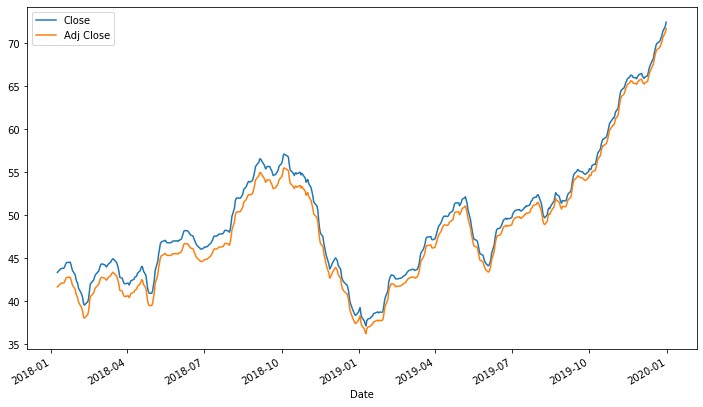

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

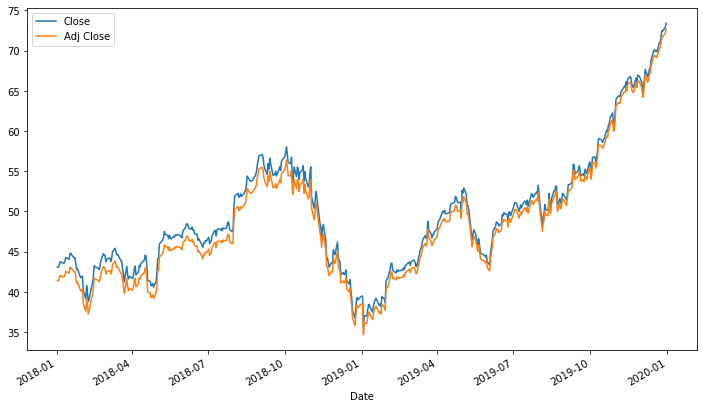

In [ ]:
# Tambien se puede hacer la gráfica con otros parametros, que tome mas itervalos

aapl.rolling(1)[['Close', 'Adj Close']].mean().plot();

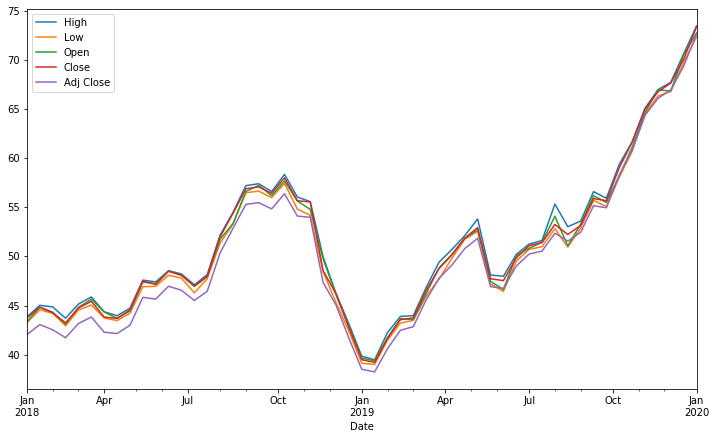

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

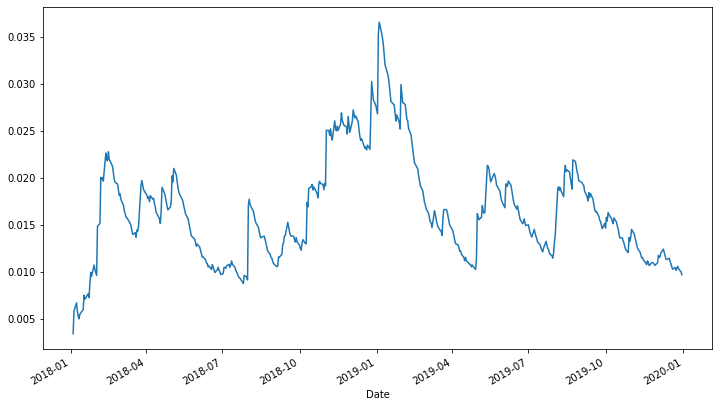

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

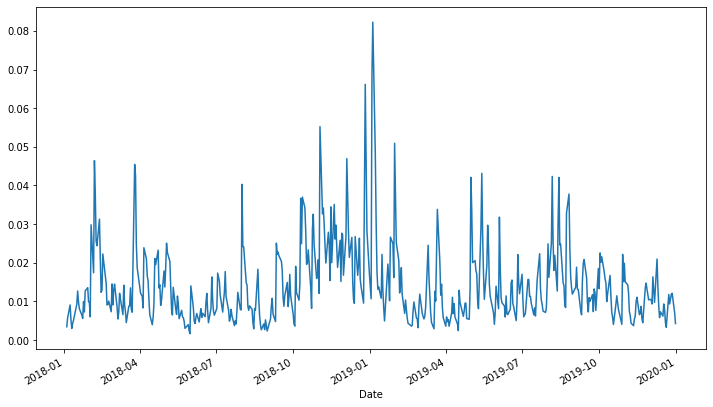

In [ ]:
# Tambien se puede usar un span mas corto de días

aapl['Close'].pct_change().ewm(span=2).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

microsoft = web.DataReader("MSFT", 'yahoo', start, end)
microsoft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.049969
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.057743
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,23.910097
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.661432
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,23.824627


In [ ]:
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
microsoft.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

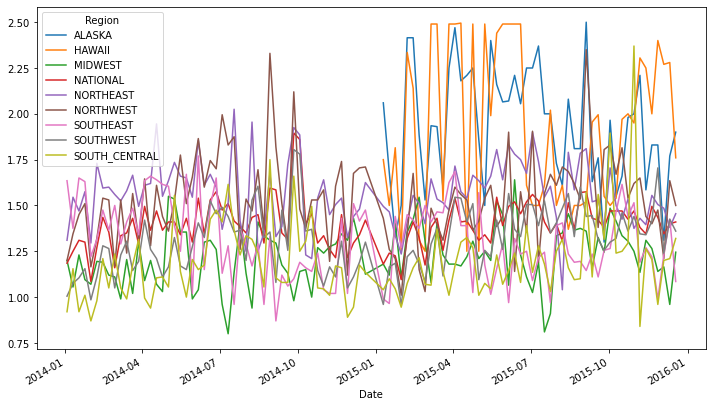

In [ ]:
# Esto se puede hacer unicamente con la info que viene desde avocados

hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

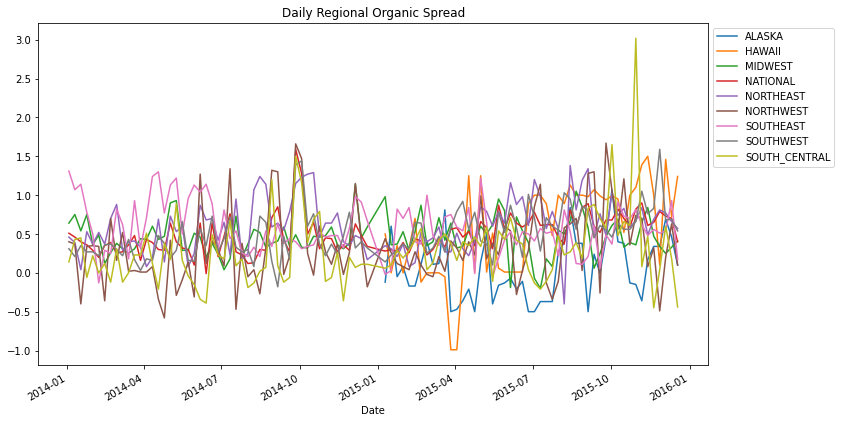

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

#Datos sobre disparidad salarial entre hombres y muejeres



In [26]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


datosSalario = pd.read_csv('/content/Disparidad_Salarial_Hombres_Mujeres.csv')
datosSalario

,variable,desagregacion_periodica,valor_periodica,año,desagregacion_geografica,valor
0,Disparidad Salarial Hombres Mujeres,Anual,Anual,2018,Nacional,175377
1,Disparidad Salarial Hombres Mujeres,Anual,Anual,2017,Nacional,192521
2,Disparidad Salarial Hombres Mujeres,Anual,Anual,2016,Nacional,197031
3,Disparidad Salarial Hombres Mujeres,Anual,Anual,2015,Nacional,203920
4,Disparidad Salarial Hombres Mujeres,Anual,Anual,2014,Nacional,205503
...,...,...,...,...,...,...
270,Disparidad Salarial Hombres Mujeres,Anual,Anual,2008,Risaralda,131659
271,Disparidad Salarial Hombres Mujeres,Anual,Anual,2008,Santander,167316
272,Disparidad Salarial Hombres Mujeres,Anual,Anual,2008,Sucre,50905
273,Disparidad Salarial Hombres Mujeres,Anual,Anual,2008,Tolima,130678


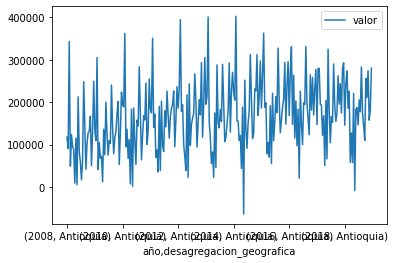

In [33]:
datosSalario.groupby(["año", "desagregacion_geografica"]).mean().plot()

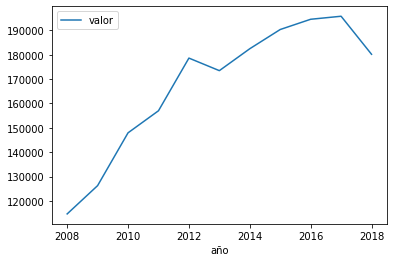

In [4]:
datosSalario.groupby("año").mean().plot()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

desagregacion_geografica
Antioquia             AxesSubplot(0.125,0.125;0.775x0.755)
Atlántico             AxesSubplot(0.125,0.125;0.775x0.755)
Bogotá                AxesSubplot(0.125,0.125;0.775x0.755)
Bolívar               AxesSubplot(0.125,0.125;0.775x0.755)
Boyacá                AxesSubplot(0.125,0.125;0.775x0.755)
Caldas                AxesSubplot(0.125,0.125;0.775x0.755)
Caquetá               AxesSubplot(0.125,0.125;0.775x0.755)
Cauca                 AxesSubplot(0.125,0.125;0.775x0.755)
Cesar                 AxesSubplot(0.125,0.125;0.775x0.755)
Chocó                 AxesSubplot(0.125,0.125;0.775x0.755)
Cundinamarca          AxesSubplot(0.125,0.125;0.775x0.755)
Córdoba               AxesSubplot(0.125,0.125;0.775x0.755)
Huila                 AxesSubplot(0.125,0.125;0.775x0.755)
La Guajira            AxesSubplot(0.125,0.125;0.775x0.755)
Magdalena             AxesSubplot(0.125,0.125;0.775x0.755)
Meta                  AxesSubplot(0.125,0.125;0.775x0.755)
Nacional              AxesSubpl

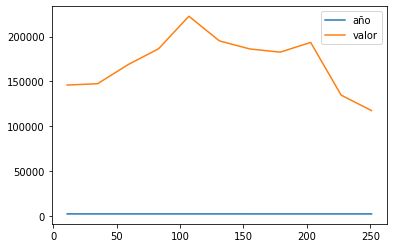

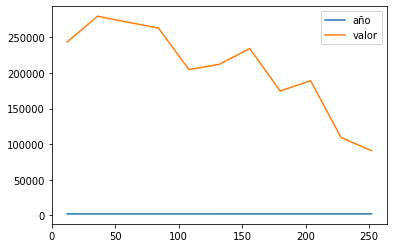

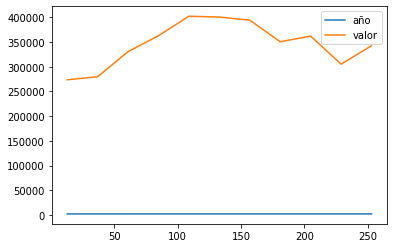

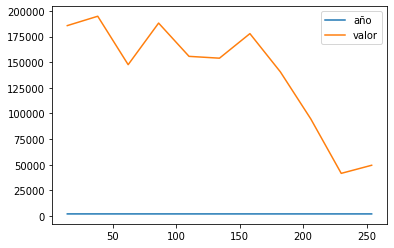

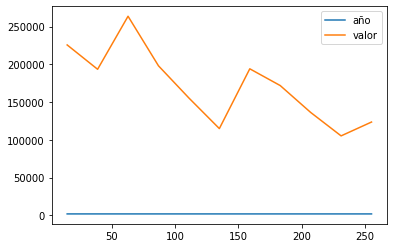

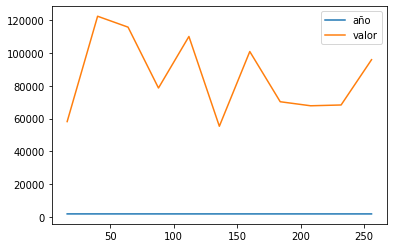

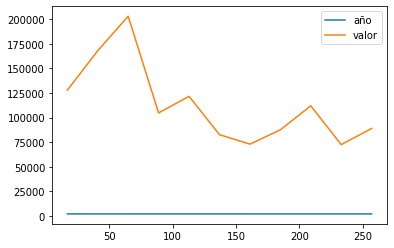

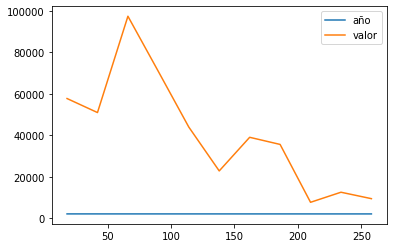

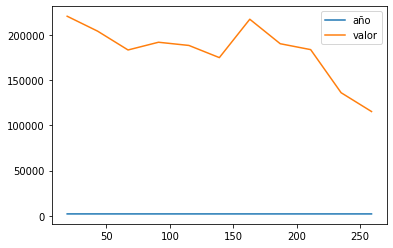

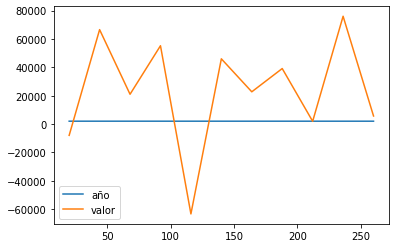

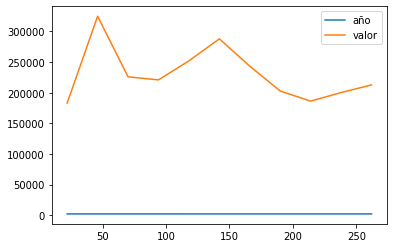

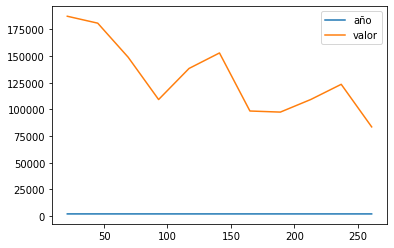

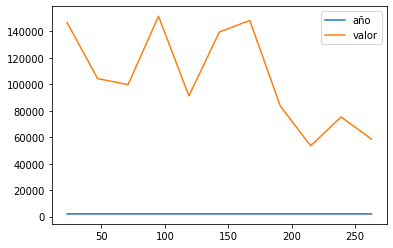

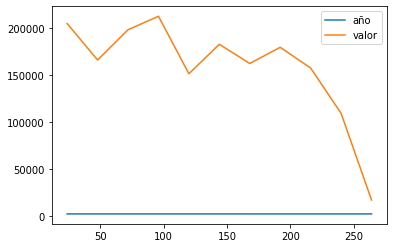

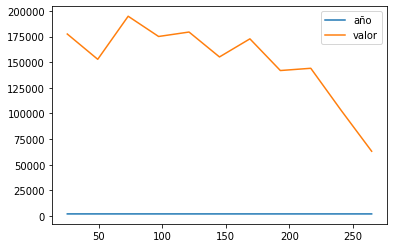

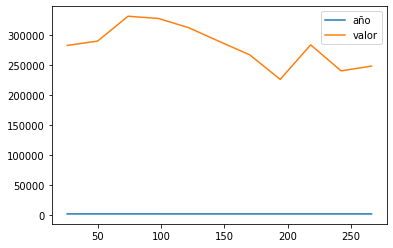

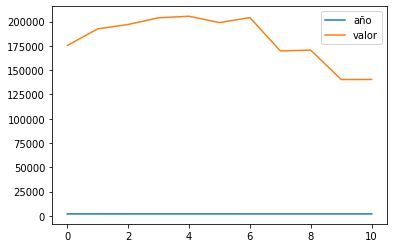

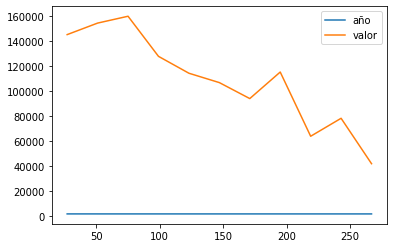

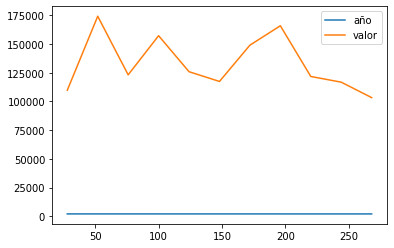

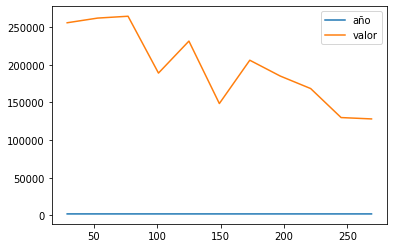

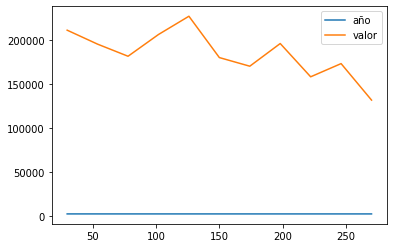

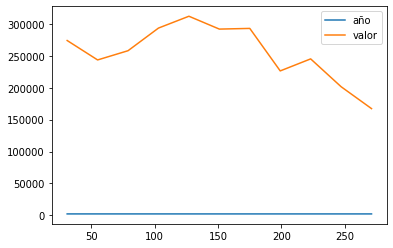

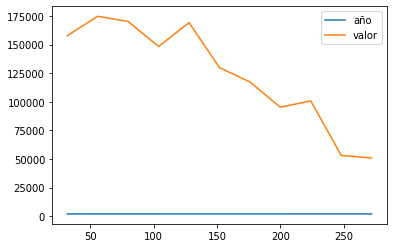

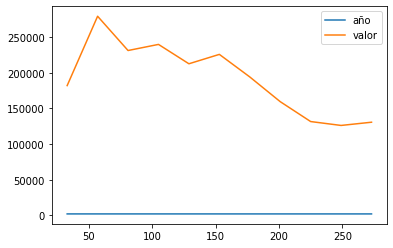

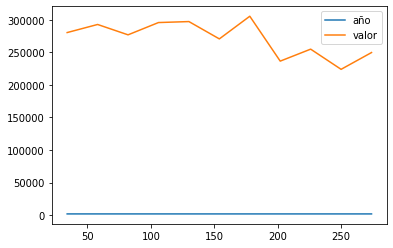

In [ ]:
datosSalario.groupby("desagregacion_geografica").plot("año","desagregacion_geografica")

Como se puede observar en general la disparidad salarial entre hombres y mujeres se mantuvo en aumento desde el 2008 hasta el 2017 mas o menos, en donde este comieza a disminuir, en donde en promedio se puede decir que se alcanzo una disparidad de 190.000 a favor de los hombres.
Sin embargo, desde 2017, este fenómeno parece estarse disminuyendo, tal ve con datos mas recientes se pueda contrastar este hipótesis.